# Algorithmic-Trading-Stock-Price-Model

### Problem Statement
To predict the volatility of intraday stock market considering various parameters.


### Existing System
Traditional approaches to stock market analysis and stock price prediction include fundamental analysis, which looks at a stock's past performance and the general credibility of the company itself, and statistical analysis, which is solely concerned with number crunching and identifying patterns in stock price variation. The latter is commonly achieved with the help of Genetic Algorithms (GA) or Artificial Neural Networks (ANN's), but these fail to capture correlation between stock prices in the form of long-term temporal dependencies. Another major issue with using simple ANNs for stock predictions the phenomenon of exploding / vanishing gradient, where the weights of a large network either become too large or too small (respectively), drastically slowing their convergence to the optimal value. 


### Approach to the problem
* Live Data Collection using yfinance Library
* Pre processing the data for drawing insights in terms of stability of the company
* Visualizing the stock price of the company right from the date of listing till present graphically
* Developing a Model using LSTM( Type of Recurrent Neural Network)
* Developing a Deployment file (app.py) using Streamlit
* Deploying our model on Website 

### Need for this Model
Stock market price prediction is a difficult undertaking that generally requires a lot of human-computer interaction. Traditional batch processing methods cannot be used effectively for stock market analysis due to the linked nature of stock prices. We present an online learning technique that employs a recurrent neural network of some sort (RNN) called Long Short Term Memory (LSTM), which uses stochastic gradient descent to update the weights for individual data points. When compared to existing stock price prediction systems, this will yield more accurate results. With varying sizes of data, the network is trained and evaluated for accuracy, and the results are tallied. A comparison with respect to accuracy is then performed against an Artificial Neural Network



In [1]:
import yfinance as yf
import pandas as pd


In [2]:
df = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300
2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900
2023-03-15,180.800003,182.339996,176.029999,180.449997,180.449997,145995600
2023-03-16,180.369995,185.809998,178.839996,184.130005,184.130005,121374500
2023-03-17,184.520004,186.220001,177.330002,180.130005,180.130005,132936600


In [4]:
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Historical Data Visualization

In [5]:
data = df.filter(['Close'])
df = np.array(data).reshape(-1,1)
df

array([[  1.59266698],
       [  1.58866704],
       [  1.46399999],
       ...,
       [180.44999695],
       [184.13000488],
       [180.13000488]])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))
scaled_df

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.43871204],
       [0.44771144],
       [0.4379295 ]])

In [7]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

2562

In [16]:
train_data = scaled_df[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([1.31893362e-03, 1.30915180e-03, 1.00428027e-03, 5.54310805e-04,
       5.05407544e-05, 0.00000000e+00, 2.70634579e-04, 2.60852469e-04,
       2.03792057e-04, 3.81495574e-04, 6.58652434e-04, 6.66803171e-04,
       7.89077648e-04, 9.96129534e-04, 7.33645693e-04, 7.20604046e-04,
       8.47769140e-04, 8.95047734e-04, 8.39618402e-04, 7.74404629e-04,
       8.02119295e-04, 7.41799054e-04, 6.74953909e-04, 8.34727493e-04,
       1.00264919e-03, 8.90156824e-04, 7.58100530e-04, 6.17893497e-04,
       6.19524578e-04, 5.26596139e-04, 3.42368009e-04, 2.93458335e-04,
       4.10841611e-04, 4.85837203e-04, 5.46160067e-04, 4.84206122e-04,
       4.87468283e-04, 5.38006705e-04, 7.05931027e-04, 5.54310805e-04,
       6.68434252e-04, 6.43979415e-04, 6.35826345e-04, 6.63543343e-04,
       5.99960650e-04, 7.58100530e-04, 8.57551250e-04, 8.55919878e-04,
       7.72773549e-04, 8.31465041e-04, 8.00490546e-04, 7.12453017e-04,
       8.02119295e-04, 8.67333068e-04, 1.00754010e-03, 8.37987322e-04,
     

In [28]:
x_train[-1]

array([0.14181536, 0.15229183, 0.15078378, 0.16454046, 0.15602854,
       0.14990504, 0.15897289, 0.1575431 , 0.15911799, 0.16110209,
       0.16060323, 0.15953047, 0.16074668, 0.15407376, 0.15817078,
       0.1538928 , 0.16198085, 0.17346811, 0.17996005, 0.19447483,
       0.22103607, 0.2240163 , 0.22010679, 0.22473691, 0.2492521 ,
       0.24149338, 0.24471164, 0.2494738 , 0.24207703, 0.24210964,
       0.26528632, 0.25311759, 0.25702548, 0.24410352, 0.228441  ,
       0.24842877, 0.23813981, 0.24182759, 0.23993316, 0.23068433,
       0.23952721, 0.23985327, 0.23953047, 0.2402739 , 0.2342629 ,
       0.22869697, 0.22149419, 0.25090034, 0.26169961, 0.2665433 ,
       0.29669289, 0.3050809 , 0.30368535, 0.32378725, 0.33163724,
       0.32580395, 0.32729406, 0.34846056, 0.36241288, 0.35828   ])

In [26]:
print(y_train[-1])
y_train[-2]

#y_train value not in corresponding index x_train 

0.4036356402057477


0.35828000156562734

In [ ]:
print 

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5011, 60, 1)

# Modelling

In [13]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))

In [14]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=40, epochs=20)

Epoch 1/20
126/126 [==============================] - 9s 49ms/step - loss: 0.0032
Epoch 2/20
126/126 [==============================] - 6s 51ms/step - loss: 1.7006e-04
Epoch 3/20
126/126 [==============================] - 6s 50ms/step - loss: 1.3257e-04
Epoch 4/20
126/126 [==============================] - 6s 50ms/step - loss: 1.1026e-04
Epoch 5/20
126/126 [==============================] - 6s 51ms/step - loss: 1.0091e-04
Epoch 6/20
126/126 [==============================] - 7s 52ms/step - loss: 1.1761e-04
Epoch 7/20
126/126 [==============================] - 7s 53ms/step - loss: 1.1241e-04
Epoch 8/20
126/126 [==============================] - 6s 50ms/step - loss: 9.5191e-05
Epoch 9/20
126/126 [==============================] - 6s 51ms/step - loss: 7.3528e-05
Epoch 10/20
126/126 [==============================] - 6s 50ms/step - loss: 8.4170e-05
Epoch 11/20
126/126 [==============================] - 6s 51ms/step - loss: 7.3245e-05
Epoch 12/20
126/126 [==============================] - 7

In [15]:
test_data = scaled_df[training_data_len - 60: , :]
x_test = []
y_test = df[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.113797423401119

# Visualization of Test Data VS Predicted Data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


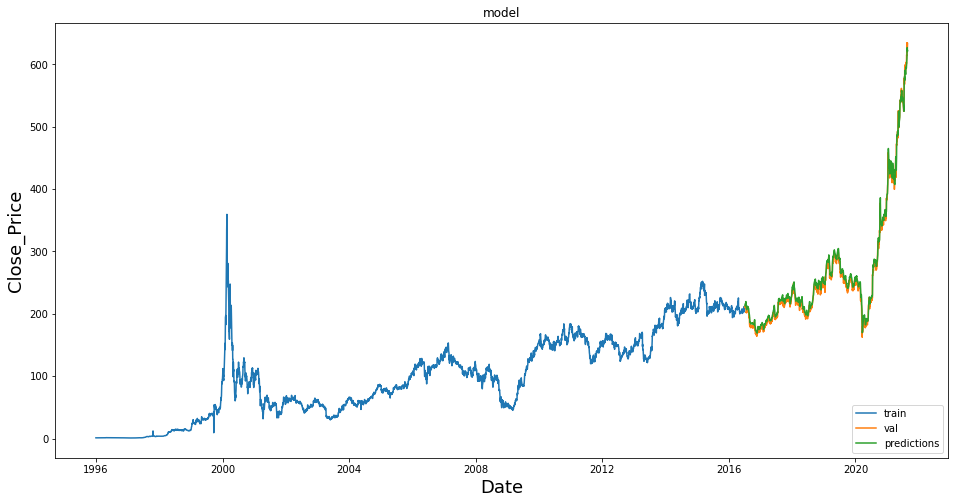

In [18]:
train = data[:training_data_len]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

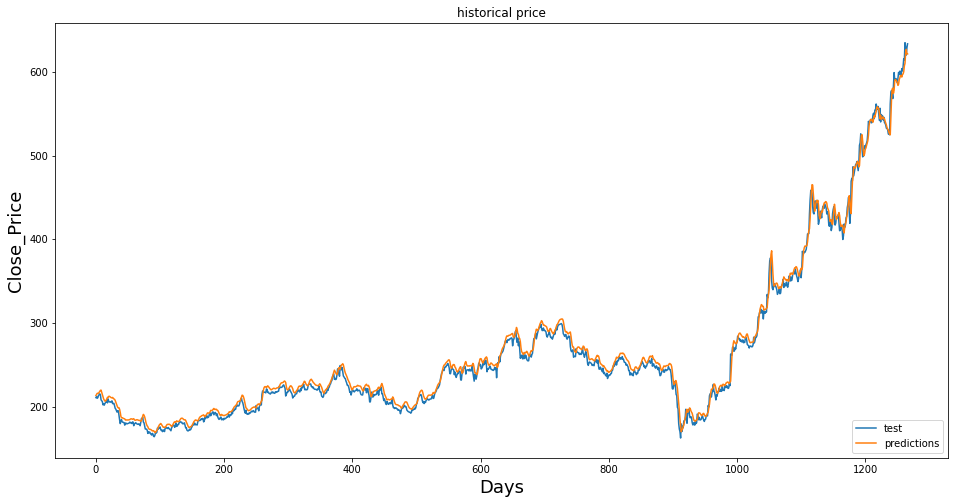

In [19]:
test = df[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()